In [1]:
%matplotlib inline

import pandas as pd
from pathlib import Path
import sqlite3
from matplotlib import pyplot as plt
import re
import numpy as np
import math

plt.style.use('ggplot')

project_dir = Path.cwd().parent
database_path = project_dir/'data'/'interim'/'relationships.sqlite'

conn = sqlite3.connect(str(database_path))
df = pd.read_sql_query('select * from relationships_submission', conn, parse_dates=['created', 'edited_date'], index_col='created')

In [2]:
df = df.infer_objects()
df.dtypes

id                      object
author                  object
downs                    int64
edited                   int64
edited_date     datetime64[ns]
locked                   int64
name                    object
num_comments             int64
permalink               object
score                    int64
title                   object
ups                      int64
dtype: object

In [3]:
def norm_series(ser):
    return ser/max(ser)

In [4]:
df_no_age = df.loc[df.title.str.match(r'.*\d+.*') == False,]
df_age = df.loc[df.title.str.match(r'.*\d+.*') == True,]

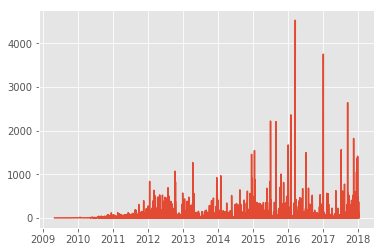

In [5]:
x = df_no_age.index
y = df_no_age.score

plt.plot(x,y)

In [6]:
df_no_age[df_no_age.score == df_no_age.score.max()]

,id,author,downs,edited,edited_date,locked,name,num_comments,permalink,score,title,ups
created,,,,,,,,,,,,
2016-03-19 01:33:46,4ayb89,Relationships_Mods,0,0,2016-03-19 01:33:46,1,t3_4ayb89,0,/r/relationships/comments/4ayb89/be_aware_exte...,4527,"Be Aware: External websites, magazines, and TV...",4527


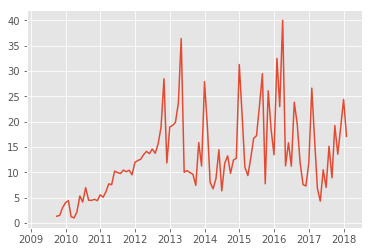

In [7]:
monthly_no_age = df_no_age.resample('M').mean() 

plt.plot(monthly_no_age.index, monthly_no_age.score)

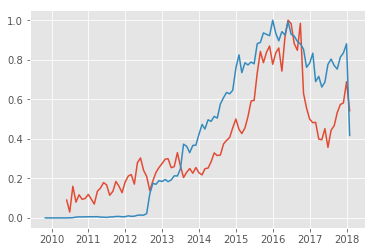

In [8]:
monthly = df_age.resample('M').mean()
monthly_count = df_age.resample('M').count()
plt.plot(monthly.index, norm_series(monthly.score))
plt.plot(monthly_count.index, norm_series(monthly_count.score))

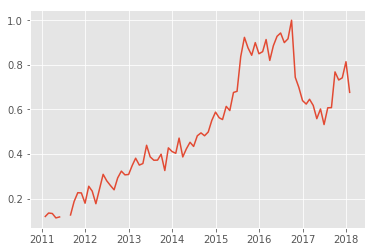

In [9]:
monthly_selected = df_age[df_age.score > 50].resample('M').mean()
plt.plot(monthly_selected.index, norm_series(monthly_selected.score))

In [10]:
monthly.tail()

,downs,edited,locked,num_comments,score,ups
created,,,,,,
2017-09-30,0.0,0.187245,1.0,16.971029,35.538596,35.538596
2017-10-31,0.0,0.197949,1.0,19.081879,38.288645,38.288645
2017-11-30,0.0,0.207968,1.0,19.581608,38.796420,38.796420
2017-12-31,0.0,0.208112,1.0,20.105053,45.945479,45.945479
2018-01-31,0.0,0.223781,1.0,19.456682,36.186952,36.186952


In [11]:
monthly_selected.tail()

,downs,edited,locked,num_comments,score,ups
created,,,,,,
2017-09-30,0.0,0.305677,1.0,83.399563,350.113537,350.113537
2017-10-31,0.0,0.368515,1.0,93.921288,333.644007,333.644007
2017-11-30,0.0,0.341969,1.0,89.369603,338.034542,338.034542
2017-12-31,0.0,0.328869,1.0,86.400298,370.934524,370.934524
2018-01-31,0.0,0.384880,1.0,93.233677,308.426117,308.426117


In [12]:
age_chunk = df_age.title.str.extractall(r'(\w+?\s?\w+?\s?\w+?\s?[\(\[].?.?\d+.?.?[\]\)]\s?\w*\s?\w*)')
age_chunk

,,0
created,match,
2011-01-17 19:51:41,0,on my ex (F-22)
2011-03-01 20:24:18,0,weird about me (m31) sleeping over
2011-04-15 11:24:28,0,"Stressed out student[M,18] living at"
2011-07-05 22:06:35,0,im moving 30miles (1hr) away from
2011-08-05 03:19:10,0,with my GF (32f)
2011-10-12 10:10:59,0,Should I (f/24) make a
2011-10-20 10:13:14,0,First post [20M]
2011-11-01 06:07:24,0,relationship with her [24f]
2011-10-31 18:24:13,0,She (32f) wants children


In [13]:
abs(len(age_chunk) - len(df_age))

-6918